

 <span style="font-weight: bold;color: red; font-size: 20px;"> Mitra Mansouri </span>

### EDA & Text Preprocessing:
Remove any irrelevant columns or entries & handle any missing or null values.

Explore the distribution of products/services in the dataset.

Analyze the length distribution of customer narratives.

Perform text preprocessing if necessary (e.g., stop word removal, lowercasing, punctuation removal,
double space removal, tokenization).

Identify the most common words or phrases used in the narratives.

Investigate whether certain products or services receive more complaints than others.

Use graphs (e.g., bar plots, word clouds, histograms) to illustrate the distribution of products, the
frequency of complaints, etc. and summarize your findings from the analysis.

Encode the labels in preparation for training

Check for class imbalance and address this.

Split the dataset into training and validation sets (e.g., 80/20 split).

In [1]:
#Required Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
from sklearn import preprocessing
# Ignore FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
# load the data
df = pd.read_csv("complaints.csv")
df.head()

,complaint_no,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


In [5]:
# We drop "complaint_no" column as it is of no use 
df.drop('complaint_no',axis='columns',inplace=True)

In [7]:
# look for empty documents & remove them
total_nulls = df[df.narrative.str.strip() == " "].shape[0]
print("Empty documents:", total_nulls)
# Remove records with no text content
df = df[~(df.narrative.str.strip() == " ")]
''' is any missing values across columns'''
df.isnull().any()
''' count of missing values of the entire dataframe'''
df.isnull().sum().sum()

Empty documents: 0


10

In [9]:
# Column corresponding to narrative has missing value
# Remove entries with missing value in narrative
df.dropna(subset=['narrative'], inplace=True)
# after removing missing value
''' is any missing values across columns'''
df.isnull().any()

product      False
narrative    False
dtype: bool

In [ ]:
df.info

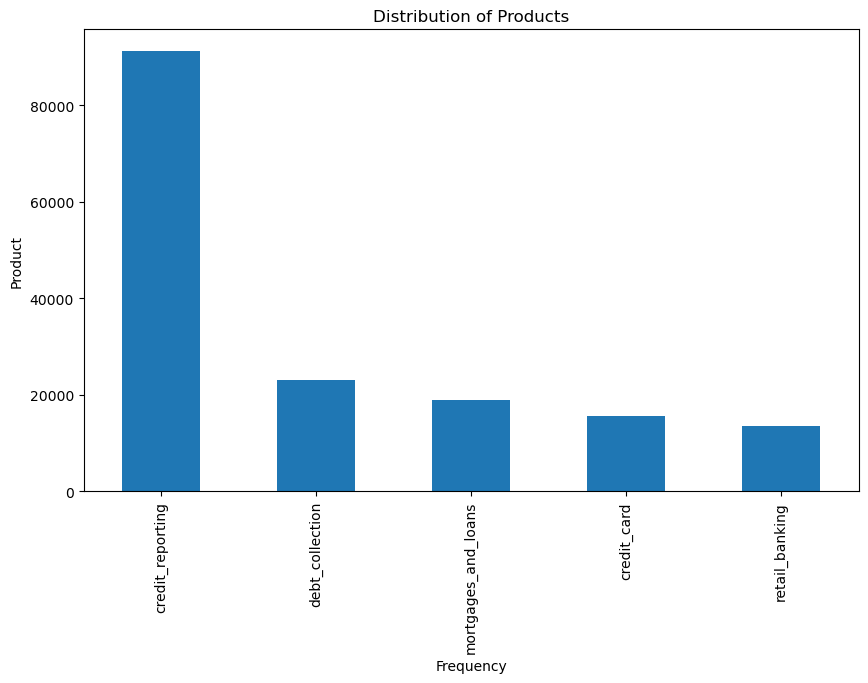

In [11]:
# Explore the distribution of products/services in the dataset
# Compute the frequency of each product/service
product_counts = df['product'].value_counts()

# Plot the distribution of products/services
plt.figure(figsize=(10, 6))
product_counts.plot(kind='bar')
plt.title("Distribution of Products")
plt.xlabel("Frequency")
plt.ylabel("Product")
plt.show()

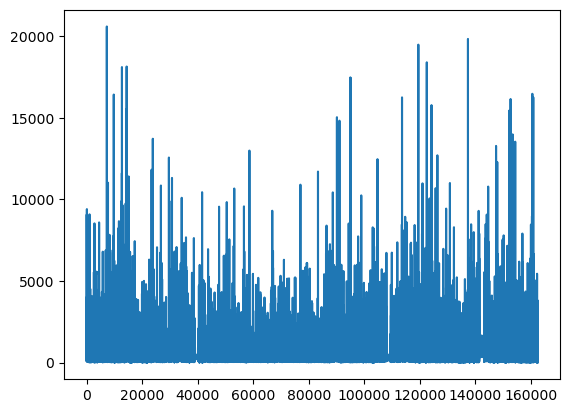

In [13]:
# Compute the length of each narrative
word_length = [len(x) for x in df['narrative']]
plt.plot(word_length)

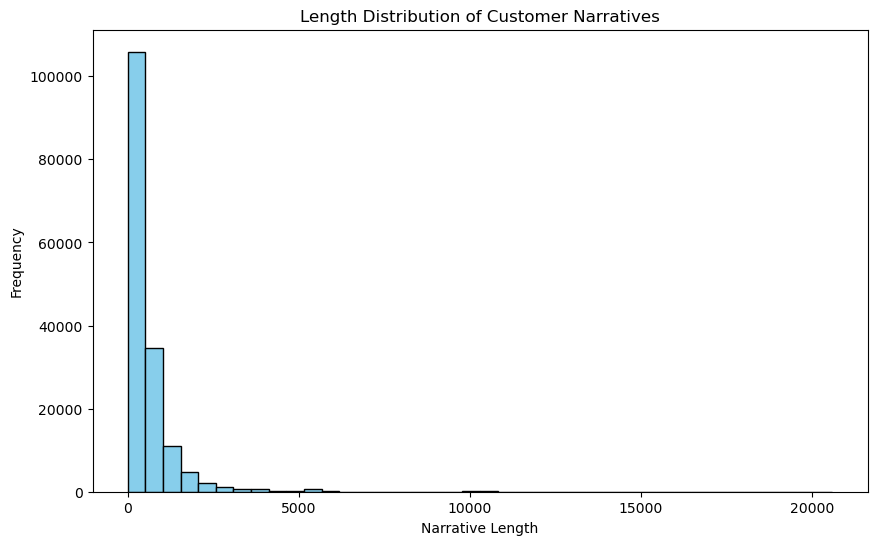

In [15]:
#Analyze the length distribution of customer narratives.

# Plot the length distribution of customer narratives
plt.figure(figsize=(10, 6))
plt.hist(df['narrative'].apply(len), bins=40, color='skyblue', edgecolor='black')
plt.title('Length Distribution of Customer Narratives')
plt.xlabel('Narrative Length')
plt.ylabel('Frequency')
plt.show()

## 
we first Calculate the length i.e. the number of Characters of each customer narrative.
then we Plot a histogram to visualize the distribution of narrative lengths.
This analysis will help us understand the typical length of customer narratives and the overall 
distribution of narrative lengths in our dataset.

### Perform text preprocessing if necessary (e.g., stop word removal, lowercasing, punctuation removal, double space removal, tokenization).

In [17]:
#install and import libraries
!pip install contractions
!pip install nltk
import contractions
import nltk
#nltk.download()
from nltk.corpus import stopwords
nltk.download('punkt')

   ---------------------------------------- 0.0/289.9 kB ? eta -:--:--
   ------------------------ --------------- 174.1/289.9 kB 5.3 MB/s eta 0:00:01
   ---------------------------------------- 289.9/289.9 kB 4.5 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mitra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
#Remove punctuation on a dataframe
import re
def remove_numbers_punctuation(text):
    return re.sub('[^a-zA-Z.,!:;]', ' ', text)

df['narrative'] = df['narrative'].apply(remove_numbers_punctuation)
#****************************************************************

#Lowercasing on a dataframe (use the apply function)
df['narrative'] = df['narrative'].apply(lambda x: " ".join(x.lower() for x in x.split()))
#****************************************************************

# Remove double spaces
df['narrative'] = df['narrative'].str.replace('  ', ' ')
#****************************************************************

# Remove contractions
def expansion(text):
    words = contractions.fix(text)
    return words
#Run the function
df['narrative'] = df['narrative'].apply(expansion)
#****************************************************************

# Remove Stopwords
stop = stopwords.words('english')
df['narrative'] = df['narrative'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.head()

,product,narrative
0,credit_card,purchase order day shipping amount receive pro...
1,credit_card,forwarded message date tue subject please inve...
2,retail_banking,forwarded message cc sent friday pdt subject f...
3,credit_reporting,payment history missing credit report speciali...
4,credit_reporting,payment history missing credit report made mis...


In [21]:
# tokenization
def tokenize_text(text):
    words = nltk.word_tokenize(text)
    return words
df['narrative'] = df['narrative'].apply(lambda x: tokenize_text(x))
df['narrative']

0         [purchase, order, day, shipping, amount, recei...
1         [forwarded, message, date, tue, subject, pleas...
2         [forwarded, message, cc, sent, friday, pdt, su...
3         [payment, history, missing, credit, report, sp...
4         [payment, history, missing, credit, report, ma...
                                ...                        
162416                                               [name]
162417                                               [name]
162418                                               [name]
162419                                               [name]
162420                                               [name]
Name: narrative, Length: 162411, dtype: object

In [23]:
#lemmatization
#Import library
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemma = WordNetLemmatizer()

def lemmatization(text):
    return [lemma.lemmatize(word=w, pos='v') for w in text]

#Code to lemmatize
df['narrative'] = df['narrative'].apply(lemmatization)
df['narrative']

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mitra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0         [purchase, order, day, ship, amount, receive, ...
1         [forward, message, date, tue, subject, please,...
2         [forward, message, cc, send, friday, pdt, subj...
3         [payment, history, miss, credit, report, speci...
4         [payment, history, miss, credit, report, make,...
                                ...                        
162416                                               [name]
162417                                               [name]
162418                                               [name]
162419                                               [name]
162420                                               [name]
Name: narrative, Length: 162411, dtype: object

## Stemming can lead to some words being reduced to meaningless words, so we did not use it here.  


****The 10 most common words and their frequencies***
account: 326912
credit: 321654
report: 306822
information: 143538
payment: 127725
call: 109710
receive: 99290
send: 86733
pay: 86657
dispute: 85084


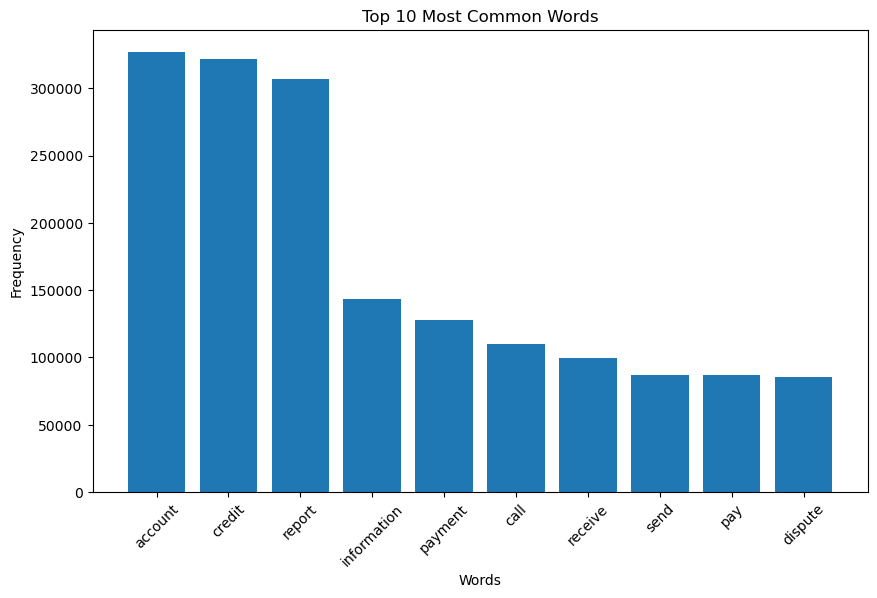

In [24]:
#Identify the most common words or phrases used in the narratives
from collections import Counter
import itertools

# Flatten the list of tokenized and lemmatized words
all_words = list(itertools.chain.from_iterable(df['narrative']))

# Count the occurrences of each word
word_counts = Counter(all_words)

# Get the most common words and their frequencies
most_common_words = word_counts.most_common(10)  

# Print the most common words and their frequencies
print('****The 10 most common words and their frequencies***')
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

# Visualize the most common words

plt.figure(figsize=(10, 6))
plt.bar(*zip(*most_common_words))
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


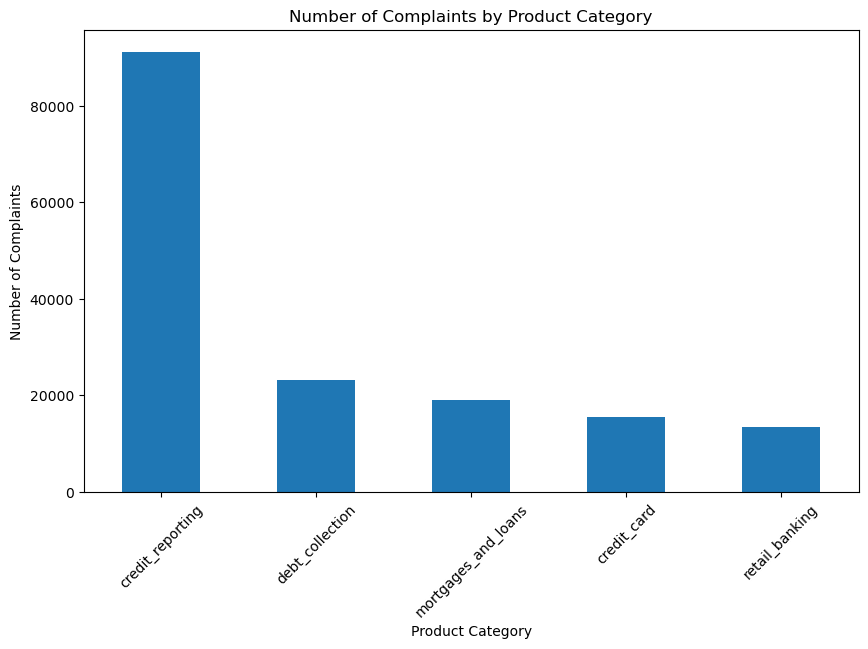

******  These graphs show that Credit-Reporting is receiving more complaints  ******


In [27]:
# Investigate whether certain products or services receive more complaints than others.

# Count complaints by product category
complaints_by_product = df['product'].value_counts()


# Visualize the distribution of complaints
plt.figure(figsize=(10, 6))
complaints_by_product.plot(kind='bar')
plt.title('Number of Complaints by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

print('******  These graphs show that Credit-Reporting is receiving more complaints  ******')

In [33]:
pip install wordcloud

   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   ----- --------------------------------- 41.0/301.4 kB 653.6 kB/s eta 0:00:01
   ----------------------------- ---------- 225.3/301.4 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 301.4/301.4 kB 2.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [35]:
import os

# List all available fonts
font_dir = 'C:/Windows/Fonts/'
fonts = [f for f in os.listdir(font_dir) if f.endswith('.ttf')]
print(fonts)


['aldhabi.ttf', 'andlso.ttf', 'arabtype.ttf', 'arial.ttf', 'arialbd.ttf', 'arialbi.ttf', 'ariali.ttf', 'ariblk.ttf', 'bahnschrift.ttf', 'calibri.ttf', 'calibrib.ttf', 'calibrii.ttf', 'calibril.ttf', 'calibrili.ttf', 'calibriz.ttf', 'cambriab.ttf', 'cambriai.ttf', 'cambriaz.ttf', 'Candara.ttf', 'Candarab.ttf', 'Candarai.ttf', 'Candaral.ttf', 'Candarali.ttf', 'Candaraz.ttf', 'comic.ttf', 'comicbd.ttf', 'comici.ttf', 'comicz.ttf', 'consola.ttf', 'consolab.ttf', 'consolai.ttf', 'consolaz.ttf', 'constan.ttf', 'constanb.ttf', 'constani.ttf', 'constanz.ttf', 'corbel.ttf', 'corbelb.ttf', 'corbeli.ttf', 'corbell.ttf', 'corbelli.ttf', 'corbelz.ttf', 'cour.ttf', 'courbd.ttf', 'courbi.ttf', 'couri.ttf', 'ebrima.ttf', 'ebrimabd.ttf', 'framd.ttf', 'framdit.ttf', 'Gabriola.ttf', 'gadugi.ttf', 'gadugib.ttf', 'georgia.ttf', 'georgiab.ttf', 'georgiai.ttf', 'georgiaz.ttf', 'himalaya.ttf', 'holomdl2.ttf', 'impact.ttf', 'Inkfree.ttf', 'javatext.ttf', 'LeelaUIb.ttf', 'LeelawUI.ttf', 'LeelUIsl.ttf', 'lucon.t

In [ ]:
pip install --upgrade pillow


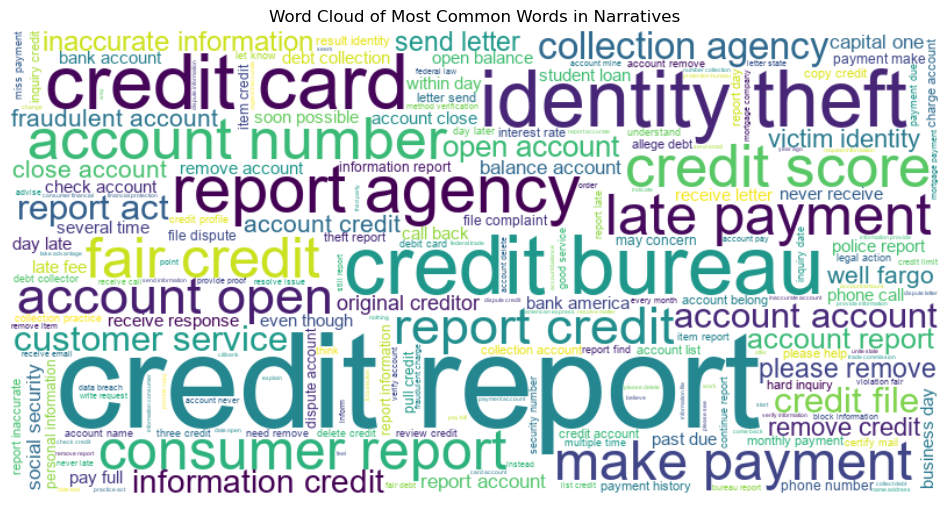

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Specify the path to the TrueType font
font_path = 'C:/Windows/Fonts/Arial.ttf'  # Adjust this path if necessary

# Word Cloud of Most Common Words in Narratives
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(' '.join(all_words))


# Display the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Most Common Words in Narratives')
plt.axis('off')
plt.show()



$\color{red}{\text{Use graphs (e.g., bar plots, word clouds, histograms) to illustrate 
the distribution of products, the frequency of complaints.}}$

### we can see from the above graph that data is imbalanced. "credit_reporting" dominates the dataset, so it indicates an imbalance. Now we address the imblance with oversampling the data.

# Addresing imbalnce

In [39]:
# Randomly selecting 8000 indices in classes with low value count
import numpy as np
New_credit_card = np.random.choice(df[df['product']=='credit_card'].index,size = 8000,replace=False)   
New_debt_collection= np.random.choice(df[df['product']=='debt_collection'].index,size = 8000,replace=False) 
New_retail_banking = np.random.choice(df[df['product']=='retail_banking'].index,size=8000,replace=False)
New_mortgages_and_loans = np.random.choice(df[df['product']=='mortgages_and_loans'].index,size = 8000,replace=False)  


# Random indices to be added
New_list = np.concatenate((New_credit_card, New_debt_collection, New_retail_banking, New_mortgages_and_loans ))
len(New_list)

32000

In [41]:
# Forming a dataframe for randomly selected indices after sampling
df_new = df[df.index.isin(New_list)]
df_new 

,product,narrative
1,credit_card,"[forward, message, date, tue, subject, please,..."
10,mortgages_and_loans,"[begin, mortgage, hold, mb, financial, mb, mor..."
11,credit_card,"[call, request, new, york, state, covid, relie..."
25,debt_collection,"[purchase, laptop, laptop, damage, turn, repai..."
29,mortgages_and_loans,"[loan, origination, first, continental, mortga..."
...,...,...
162409,retail_banking,"[yr, thru, expect, monies, account, deposit, d..."
162411,retail_banking,"[zelle, suspend, account, without, bank, let, ..."
162413,mortgages_and_loans,"[zillow, home, loan, nmls, nmls, actual, quote..."
162418,debt_collection,[name]


In [43]:
# Concatenating new df to orinigal df
df = pd.concat([df, df_new])

In [45]:
df.head()

,product,narrative
0,credit_card,"[purchase, order, day, ship, amount, receive, ..."
1,credit_card,"[forward, message, date, tue, subject, please,..."
2,retail_banking,"[forward, message, cc, send, friday, pdt, subj..."
3,credit_reporting,"[payment, history, miss, credit, report, speci..."
4,credit_reporting,"[payment, history, miss, credit, report, make,..."


In [47]:
# Encode the labels in preparation for training
# Convert product to 0,1,2,3,4
product_column = ['credit_card','retail_banking','credit_reporting','mortgages_and_loans','debt_collection']
for col in product_column:
    df['product'].replace({'credit_card': 0,'credit_reporting': 1,  'debt_collection': 2, 'mortgages_and_loans': 3,'retail_banking': 4  },inplace=True)

In [49]:
df.head(4)

,product,narrative
0,0,"[purchase, order, day, ship, amount, receive, ..."
1,0,"[forward, message, date, tue, subject, please,..."
2,4,"[forward, message, cc, send, friday, pdt, subj..."
3,1,"[payment, history, miss, credit, report, speci..."


In [51]:
#Split the dataset into training and validation sets (e.g., 80/20 split).
#Build train & validation Dataset
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y)
X = df['narrative']
y = df['product']

# Perform the 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_test.shape, y_test.shape)


Training set shape: (155528,) (155528,)
Validation set shape: (38883,) (38883,)


# ***************************************************************************
# Bi-LSTM Model Development (25%):
Preprocess the text data for model input (tokenization, padding, word embeddings).

Tokenization: Convert the text data into sequences of tokens (words or characters).

Padding: Ensure that all sequences have the same length by padding or truncating them as necessary.

Word Embeddings: Represent each token as a dense vector

#### Build a BI-LSTM model architecture for classification.

Add dropout layers to prevent overfitting, if necessary

Include a dense layer with ‘softmax’ activation

In [53]:
pip install tensorflow

     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/385.2 MB 2.8 MB/s eta 0:02:16
   ---------------------------------------- 0.3/385.2 MB 3.4 MB/s eta 0:01:54
   ---------------------------------------- 0.5/385.2 MB 3.7 MB/s eta 0:01:44
   ---------------------------------------- 0.7/385.2 MB 3.9 MB/s eta 0:01:40
   ---------------------------------------- 0.9/385.2 MB 3.9 MB/s eta 0:01:40
   ---------------------------------------- 1.1/385.2 MB 3.9 MB/s eta 0:01:40
   ---------------------------------------- 1.3/385.2 MB 4.1 MB/s eta 0:01:35
   ---------------------------------------- 1.6/385.2 MB 4.2 MB/s eta 0:01:33
   ---------------------------------------- 1.9/385.2 MB 4.6 MB/s eta 0:01:24
   ---------------------------------------- 2.2/385.2 MB 4.4 MB/s eta 0:01:

In [55]:
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dropout, Dense
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout, Embedding


# Tokenization
max_words = 10000  # Maximum number of words to keep based on frequency
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

# Converting text data to sequences
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Padding sequences to ensure uniform length
max_sequence_length = 100  # Example length, you can choose based on your data distribution
X_train_sequences_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_sequences_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length)
# Get vocabulary size
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

# Define embedding dimension
embedding_dim = 100

# Create embedding layer
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim)
#****************************************************************************


# Define model architecture
model = Sequential()

# Add embedding layer
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim))

# Add Bidirectional LSTM layer
model.add(Bidirectional(LSTM(units=64, return_sequences=True)))

# Add dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Add another Bidirectional LSTM layer
model.add(Bidirectional(LSTM(units=64)))

# Add dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Add dense layer with softmax activation for classification
model.add(Dense(units=5, activation='softmax'))  # Assuming there are 5 classes for classification

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print("Using two layers of Bidirectional LSTM helps the model learn complex patterns and relationships in the input sequences while preventing overfitting through dropout layers")

Using two layers of Bidirectional LSTM helps the model learn complex patterns and relationships in the input sequences while preventing overfitting through dropout layers


In [59]:
# build model
model.build(X_train_sequences_padded.shape)  

# Train the model
history = model.fit(X_train_sequences_padded, y_train, epochs=10, batch_size=32, validation_data=(X_test_sequences_padded, y_test))

# Print model summary
model.summary()

Epoch 1/10
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 464s 94ms/step - accuracy: 0.7615 - loss: 0.6699 - val_accuracy: 0.8547 - val_loss: 0.4200
Epoch 2/10
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 450s 92ms/step - accuracy: 0.8635 - loss: 0.4035 - val_accuracy: 0.8652 - val_loss: 0.3893
Epoch 3/10
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 455s 94ms/step - accuracy: 0.8804 - loss: 0.3509 - val_accuracy: 0.8735 - val_loss: 0.3680
Epoch 4/10
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 719s 148ms/step - accuracy: 0.8953 - loss: 0.3077 - val_accuracy: 0.8786 - val_loss: 0.3561
Epoch 5/10
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 724s 149ms/step - accuracy: 0.9066 - loss: 0.2732 - val_accuracy: 0.8820 - val_loss: 0.3582
Epoch 6/10
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 749s 154ms/step - accuracy: 0.9184 - loss: 0.2423 - val_accuracy: 0.8874 - val_loss: 0.3576
Epoch 7/10
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 1511s 311ms/step - accuracy: 0.9274 - loss: 0.2149 - val_accuracy: 0.8884 - val_loss: 0.3607
Epoch 8/10
4861/4861 ━━━━━━━━━━━━━━━━━━━━ 747s 154ms/step - accu

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (155528, 100, 100)     │     3,722,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (155528, 100, 128)     │        84,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (155528, 100, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (155528, 128)          │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (155528, 128)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (155528, 5)            │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,719,325 (44.71 MB)

 Trainable params: 3,906,441 (14.90 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,812,884 (29.80 MB)

# Model Evaluation, Interpretation & Comparison:

Evaluate the model's performance on the testing set using metrics like accuracy, precision, recall, and
F1-score.

Analyze the confusion matrix to understand the model's performance across different categories.

Visualize training and test loss curves to assess model convergence and potential overfitting.

Build two traditional classifiers, (e.g., Naïve Bayes & Random Forest) and compare the results with
the Bi-LSTM model.

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Predict probabilities for the testing set
y_predict = model.predict(X_test_sequences_padded)
y_pred = np.argmax(y_predict, axis=1)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate accuracy 
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy * 100))
# Print the metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)



1216/1216 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step
Accuracy: 89.63
Precision: 0.8969266658990828
Recall: 0.8963042975079083
F1-score: 0.8963777217231885


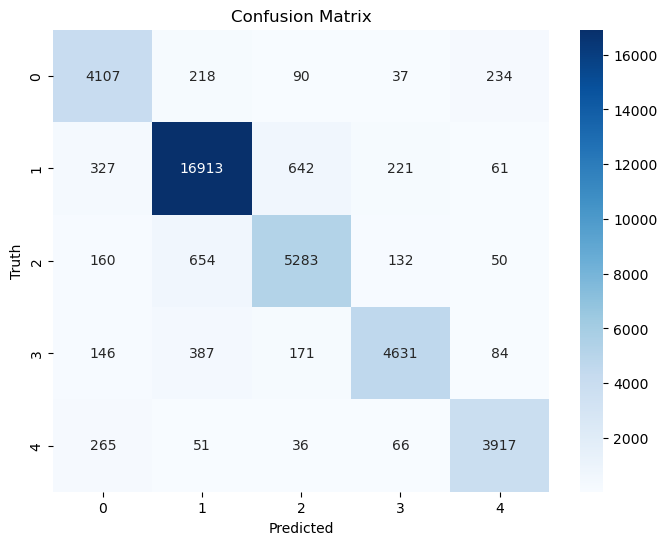

In [63]:
from sklearn.metrics import confusion_matrix
import tensorflow as tf

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

### Conclusion:
The diagonal elements of the confusion matrix represent true positives that is the number of instances where the predicted class matches the actual class.

Elements off the diagonal represent misclassifications. For example entry (1,4)=43, shows that 43 "credit reporting" is being predicted as "retail_banking". 


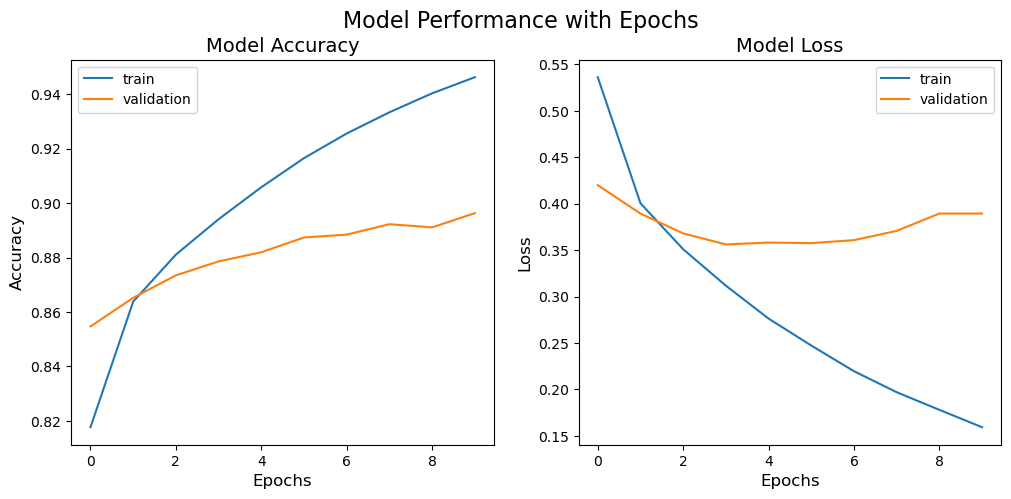

In [65]:
def accuracy_plot(history):
    
    fig, ax = plt.subplots(1, 2, figsize=(12,5))
    
    fig.suptitle('Model Performance with Epochs', fontsize = 16)
    # Subplot 1 
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy', fontsize = 14)
    ax[0].set_xlabel('Epochs', fontsize = 12)
    ax[0].set_ylabel('Accuracy', fontsize = 12)
    ax[0].legend(['train', 'validation'], loc='best')
    
    # Subplot 2
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss', fontsize = 14)
    ax[1].set_xlabel('Epochs', fontsize = 12)
    ax[1].set_ylabel('Loss', fontsize = 12)
    ax[1].legend(['train', 'validation'], loc='best')
    
    
accuracy_plot(history)

### Conclusion:
A significant drop in training loss over epochs suggests that the model is effectively learning from the training data and improving its performance. This indicates that the model is fitting the training data well. However, A  decrease in validation loss followed by an increase could indicate that the model is starting to overfit.

Moreover, when both training and validation accuracy rise as training progresses, it means the model is learning well and becoming better at making accurate predictions.

#### Build two traditional classifiers, (e.g., Naïve Bayes & Random Forest) and compare the results with the Bi-LSTM model.

In [67]:
# Build and evaluate traditional classifiers (Naïve Bayes & Random Forest)
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# Naïve Bayes Classifier
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train_sequences_padded, y_train)
NB_predict = NB_classifier.predict(X_test_sequences_padded)
NB_accuracy = accuracy_score(y_test, NB_predict)
print("Accuracy of Naïve Bayes Classifier:", NB_accuracy)

# Random Forest Classifier
RF_classifier = RandomForestClassifier()
RF_classifier.fit(X_train_sequences_padded, y_train)
RF_predict = RF_classifier.predict(X_test_sequences_padded)
RF_accuracy = accuracy_score(y_test, RF_predict)
print("Accuracy of Random Forest Classifier:", RF_accuracy)

Accuracy of Naïve Bayes Classifier: 0.42769333641951496
Accuracy of Random Forest Classifier: 0.7854589409253401
